A combined dataset from two cities: Vancouver and Victoria

Objective: Prepare data to compare the Airbnb offer in 2 BC cities.  
Objective: Airbnb from the neighborhood & host perspective

# **Table of content**

## A. Introduction
   - a. Source of file: http://insideairbnb.com/get-the-data/
   - b. Problem Statement
   - c. The Data

## B. Data cleaning and pre-processing
   - a. Column description from the website
   - b. Loading the dataset
   - c. Calculate the distance of a listing to the center of the city
   - d. Basic check before combining 2 cities
   - e. Creating New Column "City"
   - f. Concatenate the 2 cities in one file
   - g. Dropping some of the initial columns
   - h. Rename Column names
   - i. Information about the original datasets with datatypes
   - j. Analysing columns in df_listings
   - l. Analysing columns in df_reviews
   - k. Analysing columns in df_calendar
   - m. Analysing columns in df_neighborhoods
   - n. Missing values
     - i. Identify rows with only '-' or '.' in the comment column
     - ii. Checking bad characters in comment
     - iii. Summary of missing values
   - o. Outliers

## C. Master Dataset
   - a. Adding new columns
   - b. Add a new column "Sentiment" in df_reviews
   - c. Average price per listing id per quarter
   - d. Total Number of reviews per host
   - e. Calculated number of reviews for the last twelve months
   - f. Add price range and avg price for the coming year for each listing in df_listings
   - g. COMBINE THE DATASETS
   - h. Calculate no of reviews per listing and compare with existing column

## D. Create sum_hosts dataset, the summary of data by host
   - a. Create the base of the dataset
   - b. Add calculated columns

## E. Create sum_neighbourhoods dataset, the summary of data by neighbourhood
   - a. Create the base of the dataset
   - b. Add calculated columns
   - c. Read Geojson file and generate a map in an HTML file

## F. Graph
   - a. Average price comparison between Vancouver & Victoria city
   - b. Average price for Quarter 1 comparing Vancouver and Victoria city
   - c. Average price for Quarter 2 comparing Vancouver and Victoria city
   - d. Average price for Quarter 3 comparing Vancouver and Victoria city
   - e. Average price for Quarter 4 comparing Vancouver and Victoria city
   - f. Number of reviews comparison between Vancouver & Victoria city
   - g. Review sentiment comparison between Vancouver & Victoria city

## G. Conclusion

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
import re # for regexp

from datetime import date, datetime, timedelta # for date

import folium # to map coordinates
import json # to read json

import matplotlib.pyplot as plt # for vizualisations
import seaborn as sns

# A. Introduction

### a. Source of file: http://insideairbnb.com/get-the-data/

### b. Problem Statement

In the intriguing world of Data Science with multiple raw data, this project takes us through the Airbnb dataset of Vancouver and Victoria. With over 10k listings under the both of them, we're trying to find the number of stays and its insights. This covers whether the entire homes were shared or some shared spaces; we're decoding which place is popular for Airbnb activity — by taking average nights booked, nightly prices into account. Additionally, we will be delving into licenses (if they have it or not), and deciphering the subtle shift between short-term and long-term stays. Top hosts take the spotlight, revealing the listing data to better understand how Airbnb functions. The Airbnb dataset can be found <a href="http://insideairbnb.com/get-the-data/" target="_blank">here</a>.

### c. The Data

The original dataset is downloaded from this <a href="http://insideairbnb.com/get-the-data/" target="_blank">link</a>.

We have combined and formed our master dataset from two cities in the Airbnb dataset mentioned above (<a href="http://insideairbnb.com/vancouver" target="blank">Vancouver</a> and <a href="http://insideairbnb.com/victoria" target="_blank">Victoria</a>). We would like to compare these cities and monitor the activities like minimum stay, price, number of nights booked and the income of each listing for the last 12 months.

Both of the datasets have seven files in them as follows:

1. Listing: Contains detailed listings data with columns such as URLs, IDs, Name and description to match with other files combined.
2. Calendar: Contains future date to show the availability available for booking in Airbnb dataset.
3. Reviews: Contains detailed review data with IDs, dates, Name and comments for each review.
4. Listing (Summary information): Contains summarized information of data from listing column as IDs, Names, neighbourhood details, geo location, price, minimum number of nights, number of reviews, summary of reviews and license details.
5. Reviews (Summary information): Contains listing_id and date as summarized information from review data.
6. Neighbourhood: Contains neighbour details and name as a part of the dataset.  
7. Neighbourhoods GeoJSON format: Contains coordinates to map the neighbourhoods, with its name.  


With over 80 columns present in the dataset, we won't be focusing on every column as they are not required. Listing down are a few columns with its details below.

* IDs: Here id represent the primary key with which the user details are assigned and stored in the data in integer format.
  * Listing_id: Represents Airbnb's unique identifier for listing file.
  * Host_id: Represents Airbnb's unique identifier for host.
* host_url: Represents the Airbnb page for the host.
* host_name: Represents the name of the host. It usually contains just the first name(s).
* host_acceptance_rate: Contains the rate at which a host accepts booking requests.
* host_listings_count: Contains the number of listings the host has (per Airbnb calculations).
* property_type: Contains the selected property type. Additionally, the Hotels and Bed and Breakfasts are kept as described by their hosts in this field.
* room_type: All the available homes are grouped in three formats as Entire place, Private room, Shared room, and Entire place.
* price: Contains the price stored in currency (CAD).
* first_review: Contains the date of the first/oldest review.
* last_review: Contains the date of the last/newest review.
* reviews_per_month: Contains the number of reviews the listing has over the lifetime of the listing.



# B. Data cleaning and pre-processing

## a. Column description from the website
Reading the file from the "Inside Airbnb Data Dictionary.xlsx" file provided on the website with all the columns and the description.  
Each column description seems accurate except a few of them, and some missing descriptions.

In [ ]:
import openpyxl

# listings.csv columns description
data_dictionary_listings = pd.read_excel('Inside Airbnb Data Dictionary.xlsx','listings.csv detail v4.3')
column_names = data_dictionary_listings.iloc[6]
data_dictionary_listings.rename(columns = column_names, inplace = True)
data_dictionary_listings = data_dictionary_listings[7:-4]
data_dictionary_listings

,Field,Type,Calculated,Description,Reference
7,id,integer,NaN,Airbnb's unique identifier for the listing,NaN
8,listing_url,text,y,NaN,NaN
9,scrape_id,bigint,y,"Inside Airbnb ""Scrape"" this was part of",NaN
10,last_scraped,datetime,y,"UTC. The date and time this listing was ""scraped"".",NaN
11,source,text,NaN,"One of ""neighbourhood search"" or ""previous scrape"". ""neighbourhood search"" means that the listin...",NaN
...,...,...,...,...,...
77,calculated_host_listings_count,integer,y,"The number of listings the host has in the current scrape, in the city/region geography.",NaN
78,calculated_host_listings_count_entire_homes,integer,y,"The number of Entire home/apt listings the host has in the current scrape, in the city/region ge...",NaN
79,calculated_host_listings_count_private_rooms,integer,y,"The number of Private room listings the host has in the current scrape, in the city/region geogr...",NaN
80,calculated_host_listings_count_shared_rooms,integer,y,"The number of Shared room listings the host has in the current scrape, in the city/region geography",NaN


In [ ]:
# reviews.csv columns description
data_dictionary_reviews = pd.read_excel('Inside Airbnb Data Dictionary.xlsx','reviews.csv v1')
column_names = data_dictionary_reviews.iloc[6]
data_dictionary_reviews.rename(columns = column_names, inplace = True)
data_dictionary_reviews = data_dictionary_reviews[7:-3]
data_dictionary_reviews

,Field,Type,Calculated,Description,Reference
7,listing_id,NaN,NaN,NaN,NaN
8,id,NaN,NaN,NaN,NaN
9,date,NaN,NaN,NaN,NaN
10,reviewer_id,NaN,NaN,NaN,NaN
11,reviewer_name,NaN,NaN,NaN,NaN
12,comments,NaN,NaN,NaN,NaN


In [ ]:
# listings summary.csv columns description
data_dictionary_sum_listings = pd.read_excel('Inside Airbnb Data Dictionary.xlsx','listings.csv summary v2')
column_names = data_dictionary_sum_listings.iloc[6]
data_dictionary_sum_listings.rename(columns = column_names, inplace = True)
data_dictionary_sum_listings = data_dictionary_sum_listings[7:-3]
data_dictionary_sum_listings

,Field,Type,Calculated,Description,Reference
7,id,integer,NaN,Airbnb's unique identifier for the listing,NaN
8,name,string,NaN,NaN,NaN
9,host_id,integer,NaN,NaN,NaN
10,host_name,string,NaN,NaN,NaN
11,neighbourhood_group,text,y,The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as de...,NaN
12,neighbourhood,text,y,The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined ...,NaN
13,latitude,numeric,NaN,Uses the World Geodetic System (WGS84) projection for latitude and longitude.,NaN
14,longitude,NaN,NaN,Uses the World Geodetic System (WGS84) projection for latitude and longitude.,NaN
15,room_type,string,NaN,NaN,NaN
16,price,currency,NaN,"daily price in local currency. Note, $ sign may be used despite locale",NaN


In [ ]:
# calendar.csv columns description
data_dictionary_calendar = pd.read_excel('Inside Airbnb Data Dictionary.xlsx','calendar.csv v2')
column_names = data_dictionary_calendar.iloc[6]
data_dictionary_calendar.rename(columns = column_names, inplace = True)
data_dictionary_calendar = data_dictionary_calendar[7:-6]
data_dictionary_calendar

,Field,Type,Calculated,Description,Reference
7,listing_id,NaN,NaN,NaN,NaN
8,date,datetime,NaN,The date in the listing's calendar,NaN
9,available,boolean,NaN,Whether the date is available for a booking,NaN
10,price,currency,NaN,The price listed for the day,NaN
11,adjusted_price,NaN,NaN,NaN,NaN
12,minimum_nights,integer,NaN,Minimum nights for a booking made on this day,NaN
13,maximum_nights,integer,NaN,Maximum nights for a booking made on this day,NaN


## b. Loading the dataset

In [ ]:
data_files = ["Van_neighbourhoods.csv", "Van_Sum_listings.csv", "Van_Sum_reviews.csv", "Van_listings.csv", "Van_reviews.csv", "Van_calendar.csv","Vic_neighbourhoods.csv","Vic_Sum_listings.csv", "Vic_Sum_reviews.csv","Vic_listings.csv","Vic_reviews.csv","Vic_calendar.csv"]

# Dictionary to store dataframes
data = {}

for file in data_files:
    d = pd.read_csv(file)
    key = file.replace(".csv", "")
    data[key] = d
    print("Size of", file, data[key].shape)

Size of Van_neighbourhoods.csv (23, 2)
Size of Van_Sum_listings.csv (6695, 18)
Size of Van_Sum_reviews.csv (269888, 2)
Size of Van_listings.csv (6695, 75)
Size of Van_reviews.csv (269888, 6)
Size of Van_calendar.csv (2443675, 7)
Size of Vic_neighbourhoods.csv (29, 2)
Size of Vic_Sum_listings.csv (4735, 18)
Size of Vic_Sum_reviews.csv (291392, 2)
Size of Vic_listings.csv (4735, 75)
Size of Vic_reviews.csv (291392, 6)
Size of Vic_calendar.csv (1728275, 7)


## c. Calculate the distance of a listing to the center of the city

Distance of a listing to the center of the city. Add column distance_from_center.  
It's faster to add it here than later in our master dataset.

In [ ]:
import geopy.distance

# Distance of a listing to the center of the city
# Latitude and Longitude of center of downtown in Vancouver (Burrard @ Robson), taken from Google Maps
Van_center = (49.283308, -123.1253938)
# Latitude and Longitude of center of downtown in Victoria (Fairmont), taken from Google Maps
Vic_center = (48.421755, -123.368611)

# Function to calculate distance from center for each listing
def calc_distance(center, row):
    return geopy.distance.geodesic(center, (row['latitude'], row['longitude'])).km

# Calculate distance for Vancouver listings
data['Van_listings']['calc_dist_from_center'] = data['Van_listings'].apply(lambda row: calc_distance(Van_center, row), axis=1)

# Calculate distance for Victoria listings
data['Vic_listings']['calc_dist_from_center'] = data['Vic_listings'].apply(lambda row: calc_distance(Vic_center, row), axis=1)

# Display the first few rows of the updated dataframes
print("Vancouver Listings:")
data['Van_listings'][['id','calc_dist_from_center']].head()

#print("\nVictoria Listings:")
#data['Vic_listings'].head()

Vancouver Listings:


,id,calc_dist_from_center
0,13188,4.223747
1,13358,0.172432
2,13490,5.264514
3,14267,4.962790
4,14424,2.733528


In [ ]:
print("Victoria Listings: ")
data['Vic_listings'][['id','calc_dist_from_center']].head()

Victoria Listings: 


,id,calc_dist_from_center
0,1591,2.230907
1,19898,2.167724
2,41168,0.948927
3,83515,49.928223
4,116831,0.755883


## d. Basic check before combining 2 cities

Before combining the files of the 2 cities, verify that the listing ID is unique across cities.

In [ ]:
# Merging listings dataframes
df_merged_listings = pd.merge(data['Vic_listings'], data['Van_listings'], on='id', how='inner', indicator=True)
print('Listings: Number of listing_id for Van also in Vic', df_merged_listings.shape[0])
print('We expect 0')

# Merging reviews dataframes
df_merged_reviews = pd.merge(data['Vic_reviews'], data['Van_reviews'], on='listing_id', how='inner', indicator=True)
print('Reviews: Number of listing_id for Van also in Vic', df_merged_reviews.shape[0])
print('We expect 0')

# Merging calendar dataframes
df_merged_calendar = pd.merge(data['Vic_calendar'], data['Van_calendar'], on='listing_id', how='inner', indicator=True)
print('Calendar: Number of listing_id for Van also in Vic', df_merged_calendar.shape[0])
print('We expect 0')

Listings: Number of listing_id for Van also in Vic 0
We expect 0
Reviews: Number of listing_id for Van also in Vic 0
We expect 0
Calendar: Number of listing_id for Van also in Vic 0
We expect 0


## e. Creating New Column "City"

**Added a new column 'City' to each Vancouver DataFrame and assigned the value 'Vancouver'**

In [ ]:
vancouver_dfs = [data['Van_neighbourhoods'], data['Van_Sum_listings'], data['Van_Sum_reviews'], data['Van_listings'], data['Van_reviews'], data['Van_calendar']]

for df in vancouver_dfs:
    df['City'] = 'Vancouver'

**Added a new column 'City' to each Victoria DataFrame and assigned the value 'Victoria'**

In [ ]:
victoria_dfs = [data['Vic_neighbourhoods'], data['Vic_Sum_listings'], data['Vic_Sum_reviews'], data['Vic_listings'], data['Vic_reviews'], data['Vic_calendar']]

for df in victoria_dfs:
    df['City'] = 'Victoria'


## f. Concatenate the 2 cities in one file

In [ ]:
df_neighbourhoods = pd.concat([data['Van_neighbourhoods'], data['Vic_neighbourhoods']], ignore_index=True)
df_sum_listings = pd.concat([data['Van_Sum_listings'], data['Vic_Sum_listings']], ignore_index=True)
df_sum_reviews = pd.concat([data['Van_Sum_reviews'], data['Vic_Sum_reviews']], ignore_index=True)
df_listings = pd.concat([data['Van_listings'], data['Vic_listings']], ignore_index=True)
df_reviews = pd.concat([data['Van_reviews'], data['Vic_reviews']], ignore_index=True)
df_calendar = pd.concat([data['Van_calendar'], data['Vic_calendar']], ignore_index=True)

In [ ]:
print("Size of df_neighbourhoods:", df_neighbourhoods.shape)
print("Size of df_sum_listings:", df_sum_listings.shape)
print("Size of df_sum_reviews:", df_sum_reviews.shape)
print("Size of df_listings:", df_listings.shape)
print("Size of df_reviews:", df_reviews.shape)
print("Size of df_calendar:", df_calendar.shape)

Size of df_neighbourhoods: (52, 3)
Size of df_sum_listings: (11430, 19)
Size of df_sum_reviews: (561280, 3)
Size of df_listings: (11430, 77)
Size of df_reviews: (561280, 7)
Size of df_calendar: (4171950, 8)


## g. Dropping some of the initial columns

In [ ]:
print(f"The dataset contains {len(df_listings)} Airbnb listings")
df_listings.head(3)


The dataset contains 11430 Airbnb listings


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calc_dist_from_center,City
0,13188,https://www.airbnb.com/rooms/13188,20230906022824,2023-09-06,city scrape,Rental unit in Vancouver · ★4.83 · Studio · 2 beds · 1 bath,Garden level studio suite with garden patio - in a trendy and very central area of Vancouver. Lo...,The uber hip Main street area is a short walk of 6 minutes to the east. Dozens of dining option...,https://a0.muscache.com/pictures/8408188/e1af63e4_original.jpg,51466,https://www.airbnb.com/users/show/51466,Ian And Emma,2009-11-04,"Vancouver, Canada",We are a family who love to travel in comfort and enjoy the ethos and community spirit of AirBNB...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/0b83b6f7-98b7-4a0e-943f-d28ee8ba6841.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/0b83b6f7-98b7-4a0e-943f-d28ee8ba6841.jpg?aki_policy=pro...,Riley Park,2,3,"['email', 'phone']",t,t,"Vancouver, British Columbia, Canada",Riley Park,NaN,49.24773,-123.10509,Entire rental unit,Entire home/apt,4,NaN,1 bath,NaN,2.0,"[""Carbon monoxide alarm"", ""Dryer"", ""Body soap"", ""Microwave"", ""Pack \u2019n play/Travel crib"", ""I...",$151.00,2,180,2,2,180,180,2.0,180.0,NaN,t,4,11,39,299,2023-09-06,277,21,7,2010-02-21,2023-09-03,4.83,4.87,4.84,4.86,4.92,4.88,4.80,23-156488,f,2,2,0,0,1.68,4.223747,Vancouver
1,13358,https://www.airbnb.com/rooms/13358,20230906022824,2023-09-06,city scrape,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed · 1 bath,<b>The space</b><br />This suites central location puts you within walking distance of everythin...,NaN,https://a0.muscache.com/pictures/40034c18-0837-463e-a1d5-159e38469caf.jpg,52116,https://www.airbnb.com/users/show/52116,Lynn,2009-11-07,"Vancouver, Canada","I am from Vancouver and in my free time enjoy Yoga, exploring the neighborhoods of my hometown ,...",within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/User-52116/original/3b3926e6-d258-4843-ad8c-13128453f1a...,https://a0.muscache.com/im/pictures/user/User-52116/original/3b3926e6-d258-4843-ad8c-13128453f1a...,Downtown Vancouver,1,1,"['email', 'phone']",t,t,NaN,West End,NaN,49.28201,-123.12669,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shower gel"", ""Carbon monoxide alarm"", ""Body soap"", ""Microwave"", ""Iron"", ""Shampoo"", ""Baking she...",$215.00,1,90,1,1,90,90,1.0,90.0,NaN,t,4,9,21,108,2023-09-06,476,39,4,2010-06-22,2023-08-20,4.68,4.75,4.81,4.83,4.79,4.92,4.65,22-311727,f,1,1,0,0,2.96,0.172432,Vancouver
2,13490,https://www.airbnb.com/rooms/13490,20230906022824,2023-09-06,city scrape,Rental unit in Vancouver · ★4.92 · 1 bedroom · 1 bed · 1 bath,This apartment rents for one month blocks of time. This is due to new Vancouver cit

Let's remove the columns which add no value to our analysis. For simplification we will not keep all the versions of one information but keep only one. Example we will keep availability_365 and drop the other availability columns.  

'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url','host_url', 'host_name','host_thumbnail_url', 'host_picture_url','host_has_profile_pic','license'

details of rating , min and max nights

In [ ]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df_listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url','host_url', 'host_name','host_thumbnail_url', 'host_picture_url','host_has_profile_pic','license','minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','availability_30', 'availability_60',
       'availability_90','calendar_last_scraped'], axis=1, inplace=True)

## h. Rename Column names

Let's rename the ID column names in df_listings and df_reviews

In [ ]:
# Rename column "id" to "listing_id" in df_listings
df_listings.rename(columns={'id': 'listing_id'}, inplace=True)

# Rename column "id" to "Review_id" in df_reviews
df_reviews.rename(columns={'id': 'review_id'}, inplace=True)
# Rename column "name" to "listing_name" in df_listings
#df_listings.rename(columns={'name': 'listing_name'}, inplace=True)

## i. Information about the original datasets with datatypes

After examining the columns from all the datasets we realized that sum_listings and sum_reviews were not adding any information to what was already in the other datasets, then we will not use them any further.

In [ ]:
#dataframes = [df_neighbourhoods, df_sum_listings, df_sum_reviews, df_listings, df_reviews, df_calendar]
dataframes = [df_neighbourhoods, df_listings, df_reviews, df_calendar]

df_neighbourhoods.name = 'Neighbourhoods'
#df_sum_listings.name = 'Summary Listings'
#df_sum_reviews.name = 'Summary Reviews'
df_listings.name = 'Listings'
df_reviews.name = 'Reviews'
df_calendar.name = 'Calendar'


for df in dataframes:
    print(f"Info for {df.name}:")
    df.info()
    print("\n")
    print("-"*100)

Info for Neighbourhoods:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  29 non-null     object
 1   neighbourhood        52 non-null     object
 2   City                 52 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


----------------------------------------------------------------------------------------------------
Info for Listings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    11430 non-null  int64  
 1   host_id                                       11430 non-null  int64  
 2   host_since                                    11430 

## j. Analysing columns in df_listings

**Property type**

Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'Apartment', 'House', 'Hotel' and 'other' will be used, as most properties can be classified as either apartments,houses or hotel.

In [ ]:
df_listings.property_type.value_counts()

Entire home 2325
Entire rental unit 2097
Entire condo 2052
Entire guest suite 1661
Private room in home 1121
 ... 
Private room in casa particular 1
Shared room in bed and breakfast 1
Cave 1
Castle 1
Campsite 1
Name: property_type, Length: 81, dtype: int64

In [ ]:
# Replacing categories that are types of houses or apartments
df_listings.property_type.replace({
    'Entire townhouse': 'House',
    'Entire loft': 'Apartment',
    'Entire cottage':'House',
    'Entire guesthouse': 'House',
    'Entire rental unit': 'House',
    'Entire villa': 'House',
    'Entire bungalow': 'House',
    'Earth house': 'House',
    'Entire cabin': 'House'
    }, inplace=True)

df_listings.loc[df_listings.property_type.str.contains('home|house', case=False, na=False), 'property_type'] = 'House'
df_listings.loc[df_listings.property_type.str.contains('hotel', case=False, na=False), 'property_type'] = 'Hotel'
df_listings.loc[df_listings.property_type.str.contains('condo|apartment', case=False, na=False), 'property_type'] = 'Apartment'

# Replacing other categories with 'other'
df_listings.loc[~df_listings.property_type.isin(['House', 'Apartment','Hotel']), 'property_type'] = 'Other'

In [ ]:
df_listings.property_type.value_counts()

House 6587
Apartment 2437
Other 2333
Hotel 73
Name: property_type, dtype: int64

**Price**

Price will be converted to a float - currently it is a string because there is a currency sign ($).

In [ ]:
import re
# Convert the price in df_listings into a float by removing $ and ,
char_to_del='[\$\,]'
df_listings['price'] = df_listings['price'].apply(lambda s: re.sub(char_to_del,'', s)).astype(float)
#display(df_listings['price'].head())

**Bathrooms, bedrooms and beds**

Missing values will be replaced with the median (to avoid strange fractions).


In [ ]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    # Check if there are missing values before calculating the median
    if df_listings[col].notna().any():
        df_listings[col].fillna(df_listings[col].median(), inplace=True)
    else:
        print(f"Column '{col}' has all missing values.")

Column 'bathrooms' has all missing values.


Since column 'bathrooms' has only missing values , let's drop the column

In [ ]:
df_listings.drop('bathrooms', axis=1, inplace=True)

**first_review, last_review, review_scores_rating**  
Look at the percentage of missing values.

In [ ]:
print(f"Null values in 'first_review': {round(100*df_listings.first_review.isna().sum()/len(df_listings),1)}%")
print(f"Null values in 'last_review': {round(100*df_listings.last_review.isna().sum()/len(df_listings),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df_listings.review_scores_rating .isna().sum()/len(df_listings),1)}%")

Null values in 'first_review': 13.8%
Null values in 'last_review': 13.8%
Null values in 'review_scores_rating': 13.8%


**Verify number of listing_id missing in df_reviews**

In [ ]:
# Merge df_listings and df_reviews on 'listing_id'
merged_df = pd.merge(df_listings, df_reviews, on='listing_id', how='left', indicator=True)

# Filter for rows only in df_listings (left_only)
missing_listings = merged_df[merged_df['_merge'] == 'left_only']

# Display the count and 'listing_id' values that are present in df_listings but not in df_reviews
print("Count of listings in df_listings but not in df_reviews:", missing_listings.shape[0])
#print("Listing IDs in df_listings but not in df_reviews:")
#print(missing_listings['listing_id'].unique())


Count of listings in df_listings but not in df_reviews: 1575


**host_response_rate & host_acceptance_rate**

host acceptance rate, and host response rate columns are stored as strings and also contain "%" character. Let's remove them and convert to float.

In [ ]:

df_listings["host_response_rate"] = df_listings["host_response_rate"].str[:-1].astype("float") / 100
df_listings["host_acceptance_rate"] = df_listings["host_acceptance_rate"].str[:-1].astype("float") / 100

In [ ]:
display(df_listings[["host_response_rate","host_acceptance_rate"]].head(3))

,host_response_rate,host_acceptance_rate
0,1.0,1.00
1,1.0,0.98
2,1.0,0.96


## l. Analysing columns in df_reviews

**Date**  
Convert date column in date type + Rename column to date_review

In [ ]:
#Convert date in date type and rename it date_review
df_reviews['date'] = pd.to_datetime(df_reviews['date'],format='%Y-%m-%d')
df_reviews.rename(columns={'date': 'date_review'}, inplace=True)
display(df_reviews.head())

,listing_id,review_id,date_review,reviewer_id,reviewer_name,comments,City
0,13188,27060,2010-02-21,34595,Rebecca,"We had a wonderful time! The place is cozy, warm (with a fireplace!), and outfitted with every a...",Vancouver
1,1736349,41020408,2015-08-03,39708695,Carleigh,"Kerry was a fantastic host, very friendly and accommodating. She made sure she was home when we ...",Vancouver
2,1736349,41996709,2015-08-10,38001212,Alexander Franz,We had a very great time at Kerry's place. She gave us a lot of tips for our trips in and around...,Vancouver
3,1736349,43175647,2015-08-17,24042205,Junda,The place was very comfortable and felt like home. I liked how I got to park in a garage and ho...,Vancouver
4,1736349,43726318,2015-08-21,41117022,Merle,We had a few great days in the Townhouse! Just the bed is worth it to book this Room. The brathr...,Vancouver


## k. Analysing columns in df_calendar

**Date**  
Convert date column in date type + Rename column to date_cal

In [ ]:
#Convert date in date type and rename it date_cal
df_calendar['date'] = pd.to_datetime(df_calendar['date'],format='%Y-%m-%d')
df_calendar.rename(columns={'date': 'date_cal'}, inplace=True)
display(df_calendar.head())

,listing_id,date_cal,available,price,adjusted_price,minimum_nights,maximum_nights,City
0,13188,2023-09-06,f,$154.00,$154.00,2.0,180.0,Vancouver
1,13188,2023-09-07,f,$150.00,$150.00,2.0,180.0,Vancouver
2,13188,2023-09-08,f,$152.00,$152.00,2.0,180.0,Vancouver
3,13188,2023-09-09,t,$150.00,$150.00,2.0,180.0,Vancouver
4,13188,2023-09-10,f,$151.00,$151.00,2.0,180.0,Vancouver


**Price**  
Let's convert the datatype for price and adjusted_price in df_calendar to float

In [ ]:
# Convert the price and adjusted_price in df_calendar into a float by removing $ and ,
char_to_del='[\$\,]'
df_calendar['price'] = df_calendar['price'].apply(lambda s: re.sub(char_to_del,'', s)).astype(float)
df_calendar['adjusted_price'] = df_calendar['adjusted_price'].apply(lambda s: re.sub(char_to_del,'', s)).astype(float)
#display(df_calendar.head())

**Check**  
Calendar: Check if price and price_adjusted are different  
Conclusion is that there are some difference, but no missing price.  
We assume that the price is adjusted by the host and we will use the adjusted_price for our calculations.

In [ ]:
#Calendar: Check if price and price_adjusted is different
#We can assume that the price is adjusted by the host
print('Size of calendar',df_calendar.size)
# check if listing_id is a duplicate in Van and Vic
df_diff = df_calendar[df_calendar['price']!=df_calendar['adjusted_price']]
print('Calendar: Nb of price different from adjusted_price', df_diff.size)
#Check if adjusted_price is empty
df_calendar[['price','adjusted_price']].isnull().sum()
#Result no missing price, we can use the adjusted_price for our calculations

Size of calendar 33375600
Calendar: Nb of price different from adjusted_price 1462816


price 0
adjusted_price 0
dtype: int64

## m. Analysing columns in df_neighborhoods

For the city of Vancouver, neighbourhood_group is blank, fill it up with "Vancouver".  
The Vancouver dataset covers only the Airbnb listings in the city of Vancouver, while the Victoria dataset covers properties in a large area around Victoria. This is what is represented in the column neighbourhood_group.  

After review, in df_neighbourhoods there is 1 neighborhood in each group except for Vancouver and Victoria.

In [ ]:
# Fill the neighbourhood_group in df_listings too
df_listings.loc[(df_listings['City']=='Vancouver'),'neighbourhood_group_cleansed'] = 'Vancouver'
# groups by columns
grouped = df_listings.groupby('neighbourhood_group_cleansed').size()
grouped
#Result: there are many listings in each neighborhood_group. It looks like there is no more missing values

neighbourhood_group_cleansed
Central Saanich 112
Colwood 165
Esquimalt 143
Highlands 20
Juan de Fuca 358
Langford 436
Metchosin 48
North Saanich 141
Oak Bay 77
Saanich 859
Salt Spring Island 334
Sidney 97
Sooke 249
Southern Gulf Islands 210
Vancouver 6695
Victoria 1407
View Royal 79
dtype: int64

In [ ]:
df_neighbourhoods.loc[(df_neighbourhoods['City']=='Vancouver'),'neighbourhood_group'] = 'Vancouver'
# groups by columns
grouped = df_neighbourhoods.groupby('neighbourhood_group').size()
grouped
#Result: there is 1 neighborhood in each group except for Vancouver and Victoria

neighbourhood_group
Central Saanich 1
Colwood 1
Esquimalt 1
Highlands 1
Juan de Fuca 1
Langford 1
Metchosin 1
North Saanich 1
Oak Bay 1
Saanich 1
Salt Spring Island 1
Sidney 1
Sooke 1
Southern Gulf Islands 1
Vancouver 23
Victoria 14
View Royal 1
dtype: int64

After review, in df_listings there are many listings in each neighborhood_group.

## n. Missing values

In [ ]:
dataframes = [df_neighbourhoods, df_listings, df_reviews, df_calendar]

for df in dataframes:
    # Find columns with missing values and their total count
    missing_values_info = df.isna().sum()

    # Display columns with missing values and their total count
    print(f"Columns with missing values in {df.name}:")
    for column, total_missing_values in missing_values_info.items():
        if total_missing_values > 0:
            print(f"{column}: {total_missing_values} missing values")
    print("\n" + " " * 2 + "-" * 100 + "\n")

Columns with missing values in Neighbourhoods:

  ----------------------------------------------------------------------------------------------------

Columns with missing values in Listings:
host_location: 2258 missing values
host_about: 4976 missing values
host_response_time: 1590 missing values
host_response_rate: 1590 missing values
host_acceptance_rate: 1253 missing values
host_is_superhost: 286 missing values
host_neighbourhood: 3574 missing values
neighbourhood: 3783 missing values
bathrooms_text: 3 missing values
calendar_updated: 11430 missing values
first_review: 1575 missing values
last_review: 1575 missing values
review_scores_rating: 1573 missing values
review_scores_accuracy: 1587 missing values
review_scores_cleanliness: 1587 missing values
review_scores_checkin: 1588 missing values
review_scores_communication: 1587 missing values
review_scores_location: 1588 missing values
review_scores_value: 1588 missing values
reviews_per_month: 1575 missing values

  --------------

We noticed that some characters are still considered not printable even if the comment shows correctly to the human eye. Identifying every case where a character is not printed correctly is known as a tedious and long task. This is just a preliminary check. Reviews'comments are not often used in a statistical analysis, so we can accept a few bad characters for this project.

### i. Identify rows with only '-' or '.' in the comment column

In [ ]:
rows_with_only_dash_or_dot = df_reviews[df_reviews['comments'].fillna('').str.match(r'^[.-]+$')]
rows_with_only_dash_or_dot['comments']

2355 -
6066 .
6699 -
8816 .
9795 .
 ..
558150 .
558491 .
558545 .
558812 .
561253 .
Name: comments, Length: 565, dtype: object

We have discovered that there are 565 rows in the comments column that consist solely of either a period (.) or a hyphen (-).

### ii. Checking bad characters in comment

In [ ]:

import string  # Importing string module for ASCII characters


#
# Function to check for non-printable characters
def has_bad_chars(comment):
    printable = set(string.printable)

    if pd.isna(comment):
        return False
    else:
        comment.replace('<br/>','')
        return any(char not in printable for char in comment)

# Apply the function to identify rows with non-printable characters
rows_with_bad_characters = df_reviews[df_reviews['comments'].apply(has_bad_chars)]

# Display rows with comments containing non-printable characters
rows_with_bad_characters.head()

,listing_id,review_id,date_review,reviewer_id,reviewer_name,comments,City
9,1736349,47125619,2015-09-15,2046334,Mia,I had a very pleasant 4-night stay at Kerry's. She is a friendly and very considerate host. I fe...,Vancouver
17,654763,68284317,2016-04-04,14147685,Lilia,I had an amazing stay at this suite !<br/>The hosts are easily reachable and nice :) <br/>The fl...,Vancouver
31,654763,357595314,2018-12-10,12676029,Stephanie,I stayed three months in Allison's suite and it felt like home. It only takes 25 minutes by bus ...,Vancouver
34,654763,785648933964729267,2022-12-19,460925760,Leanna,I was here for just over 3 months and it was perfect for what I needed! <br/>It looks exactly li...,Vancouver
78,659986,90565138,2016-08-01,86325954,May,房东人很好，在我们晚上十点回来打不开门时，回短信速度快，然后下来帮我们开门。房子所在街区非常的安静，很大地方street parking。旁边是Queen Elizabeth park，街道干...,Vancouver


### iii. Summary of missing values  
**Missing values replaced**
  - Neighbourhood group(df_neighbourhoods) --  Neighbourhood group data is not available for Vancouver. It was filled with 'Vancouver'
  - neighbourhood_group_cleansed -- Filled with 'Vancouver' since all the missing values are related to 'Vancouver' city.
  - Bedrooms and beds - Replaced with median to avoid strange fractions
  - Bathrooms - Dropped the column since bathrooms has only missing values
  
**Missing values (no change)**
  - host_is_superhost(df_listings)--  There is no common host_id.
  - host_response_rate(df_listings) --  there is no common host_id.
  - host_acceptance_rate(df_listings) -- There is no common host_id.
  - reviews_per_month(df_listings) -- checked common listing_id for the missing values in  reviews_per_month with remaining listing_id.  there is no common listing_id.
  
**Missing Values(less important)**
  - First review and last review(df_listings) - these columns contain date information. Both columns contain a small percentage of missing values.
  - host_about -- Description about the host
  - comments -- comments about the host by the reviewer. We have identified 565 rows that contain only '-' or '.' and no other values.
  - review_scores_rating -- No details available about the column
  

## o. Outliers


Let's check if we have outliers in price, accomodates, review_scores_rating, reviews_per_month, calculated_host_listings_count


In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers in the specified column
columns_to_check = ['price', 'accommodates', 'review_scores_rating', 'reviews_per_month','calculated_host_listings_count']

for column_name in columns_to_check:
    outliers = detect_outliers(df_listings[column_name])
    num_outliers = outliers.sum()
    print(f"Outliers in {column_name}: {num_outliers}")

Outliers in price: 740
Outliers in accommodates: 641
Outliers in review_scores_rating: 613
Outliers in reviews_per_month: 262
Outliers in calculated_host_listings_count: 1670


# C. Master Dataset

### a. Adding new columns
Before we merge different dataframes let's look at the unique keys in each of them
-> Potential primary keys in each dataframe

In [ ]:
df_neighbourhoods.name = "df_neighbourhoods"
df_listings.name = "df_listings"
df_reviews.name = "df_reviews"
df_calendar.name = "df_calendar"
dataframes = [df_neighbourhoods, df_listings, df_reviews, df_calendar]


def can_serve_as_key(df, col_name):
    nb_unique_values = len(df[col_name].unique())
    nb_rows = df.shape[0]

    if nb_unique_values == nb_rows:
        print("YES:", nb_unique_values, "unique", col_name, "values,", nb_rows, "rows", "\n")
        return True
    return False


for df in dataframes:
    print(f"Checking potential keys for {df.name}:")

    # Flag to track if any potential keys are found
    keys_found = False

    for column in df.columns:
        if can_serve_as_key(df, column):
            keys_found = True

    # Print if no potential keys are found
    if not keys_found:
        print("No potential keys found\n")

Checking potential keys for df_neighbourhoods:
No potential keys found

Checking potential keys for df_listings:
YES: 11430 unique listing_id values, 11430 rows 

Checking potential keys for df_reviews:
YES: 561280 unique review_id values, 561280 rows 

Checking potential keys for df_calendar:
No potential keys found



### b. Add a new column "Sentiment" in df_reviews
by analyzing comments and categorizing as positive/negative/neutral using a custom sentiment dictionary


In [ ]:


def is_english(text):
    # Define a simple check for English based on ASCII character range
    return all(ord(char) < 128 for char in text)



def analyze_sentiment_with_dict(review):
    sentiment_dict = {
        'wonderful': 2, 'love': 2, 'great': 2, 'good': 1, 'pleased': 2,
        'pretty': 1, 'peaceful': 1, 'super': 2, 'nice': 1, 'awesome': 2,
        'loved': 2, 'loving': 2, 'outstanding': 2, 'comfortable': 1,'enjoyed': 2,
        'loud': -1, 'disappointing': -2, 'bad': -1, 'horrible': -2,
        'awful': -2, 'terrible': -2, 'amazing': 2, 'fantastic': 2,
        'excellent': 2, 'horrid': -2, 'hate': -2, 'disgusting': -2,
        'disgusted': -2, 'dislike': -1, 'pleasant': 1, 'unpleasant': -1,
        'displeased': -1, 'unpleased': -1, 'displeasing': -1,
        'satisfactory': 1, 'unsatisfactory': -1, 'satisfied': 1,
        'unsatisfied': -1, 'happy': 2, 'sad': -2, 'joyful': 2,
        'miserable': -2, 'excited': 2, 'boring': -1, 'fun': 2,
        'bored': -2, 'delighted': 2, 'depressed': -2, 'overjoyed': 2,
        'angry': -2, 'calm': 1, 'cheerful': 2, 'grim': -2,
        'hopeful': 1, 'hopeless': -2, 'merry': 2, 'melancholy': -1,
        'peaceful': 1, 'anxious': -1, 'content': 1, 'discontent': -1,
        'brilliant': 2, 'average': 0, 'exceptional': 2, 'mediocre': 0,
        'stellar': 2, 'ordinary': 0, 'positive': 1, 'negative': -1,
        'upbeat': 1, 'downbeat': -1, 'vibrant': 2, 'dull': -1,
        'friendly': 1, 'hostile': -1, 'optimistic': 1, 'pessimistic': -1,
        'successful': 2, 'failure': -2, 'efficient': 2, 'inefficient': -2,
        'pleasant': 1, 'unpleasant': -1, 'cozy': 1, 'uncomfortable': -1,

    }

    if isinstance(review, str)and is_english(review):
        words = review.lower().split()
        sentiment_score = sum(sentiment_dict.get(word, 0) for word in words)

        if sentiment_score > 0:
            return 'Positive'
        elif sentiment_score < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'NaN'

# Apply sentiment analysis to the 'comments' column and create a new column 'review_sentiment'
df_reviews['review_sentiment'] = df_reviews['comments'].apply(analyze_sentiment_with_dict)






We can expand the dictionary list further to make the code more efficient.

In [ ]:
display(df_reviews[['comments','review_sentiment']])

,comments,review_sentiment
0,"We had a wonderful time! The place is cozy, warm (with a fireplace!), and outfitted with every a...",Positive
1,"Kerry was a fantastic host, very friendly and accommodating. She made sure she was home when we ...",Positive
2,We had a very great time at Kerry's place. She gave us a lot of tips for our trips in and around...,Positive
3,The place was very comfortable and felt like home. I liked how I got to park in a garage and ho...,Positive
4,We had a few great days in the Townhouse! Just the bed is worth it to book this Room. The brathr...,Positive
...,...,...
561275,The Airbnb was conform to the description. we appreciated our stay and the neighborhood. The cit...,Neutral
561276,I really enjoyed staying at Sam & Rosie's. it's a beautiful location a short walk to the ocean a...,Positive
561277,"Located in a quiet and safe neighborhood, this cozy and clean unit is easily accessible as it is...",Positive
561278,"A great choice if your staying in Oak Bay. Steps from the beach, cozy and easy to access, privat...",Positive


In [ ]:
df_reviews['review_sentiment'].value_counts()

Positive 363137
NaN 117427
Neutral 79670
Negative 1046
Name: review_sentiment, dtype: int64

We have considered all the non english words as NaN's in the review_sentiment column .

### c. Average price per listing id per quarter

This dataframe consists of average price calculated for every listing_id. Further, this is divided into by quarter for every listing. Therefore, we can view what the price looks like for every quarter for each listing id.

In [ ]:
#average price per quarter created with quarter column and average price

df_calendar['quarter'] = df_calendar['date_cal'].dt.quarter

average_price_per_quarter = df_calendar.groupby(['listing_id', 'quarter'])['adjusted_price'].mean().reset_index()

average_price_per_quarter.rename(columns={'adjusted_price': 'average_price_per_quarter'}, inplace=True)

df_calendar = pd.merge(df_calendar, average_price_per_quarter[['listing_id', 'quarter', 'average_price_per_quarter']], on=['listing_id', 'quarter'], how='left')

average_price_per_quarter['average_price_per_quarter'] = average_price_per_quarter['average_price_per_quarter']

df_avg_price_listing_id = average_price_per_quarter[['listing_id', 'quarter', 'average_price_per_quarter']].copy()

df_avg_price_listing_id.head(5)

,listing_id,quarter,average_price_per_quarter
0,1591,1,209.000000
1,1591,2,277.461538
2,1591,3,338.780220
3,1591,4,253.239130
4,13188,1,150.428571


In [ ]:
#quarterly price merged with df_calender

df_avg_price_listing_id_pivot = average_price_per_quarter.pivot(index='listing_id', columns='quarter', values='average_price_per_quarter')
df_avg_price_listing_id_pivot.columns = ['calc_avg_price_Q1', 'calc_avg_price_Q2', 'calc_avg_price_Q3', 'calc_avg_price_Q4']
df_avg_price_listing_id_pivot.reset_index(inplace=True)
df_result = pd.merge(df_calendar, df_avg_price_listing_id_pivot, on='listing_id', how='left')
df_result.head(5)




,listing_id,date_cal,available,price,adjusted_price,minimum_nights,maximum_nights,City,quarter,average_price_per_quarter,calc_avg_price_Q1,calc_avg_price_Q2,calc_avg_price_Q3,calc_avg_price_Q4
0,13188,2023-09-06,f,154.0,154.0,2.0,180.0,Vancouver,3,151.604396,150.428571,150.692308,151.604396,150.282609
1,13188,2023-09-07,f,150.0,150.0,2.0,180.0,Vancouver,3,151.604396,150.428571,150.692308,151.604396,150.282609
2,13188,2023-09-08,f,152.0,152.0,2.0,180.0,Vancouver,3,151.604396,150.428571,150.692308,151.604396,150.282609
3,13188,2023-09-09,t,150.0,150.0,2.0,180.0,Vancouver,3,151.604396,150.428571,150.692308,151.604396,150.282609
4,13188,2023-09-10,f,151.0,151.0,2.0,180.0,Vancouver,3,151.604396,150.428571,150.692308,151.604396,150.282609


In [ ]:
#quarterly price merged with df_listings

df_listings = pd.merge(df_listings, df_avg_price_listing_id_pivot, on='listing_id', how='left')
df_listings.head(5)

,listing_id,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,calendar_updated,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calc_dist_from_center,City,calc_avg_price_Q1,calc_avg_price_Q2,calc_avg_price_Q3,calc_avg_price_Q4
0,13188,51466,2009-11-04,"Vancouver, Canada",We are a family who love to travel in comfort and enjoy the ethos and community spirit of AirBNB...,within an hour,1.0,1.00,t,Riley Park,2,3,"['email', 'phone']",t,"Vancouver, British Columbia, Canada",Riley Park,Vancouver,49.24773,-123.10509,House,Entire home/apt,4,1 bath,2.0,2.0,"[""Carbon monoxide alarm"", ""Dryer"", ""Body soap"", ""Microwave"", ""Pack \u2019n play/Travel crib"", ""I...",151.0,NaN,t,299,277,21,7,2010-02-21,2023-09-03,4.83,4.87,4.84,4.86,4.92,4.88,4.80,f,2,2,0,0,1.68,4.223747,Vancouver,150.428571,150.692308,151.604396,150.282609
1,13358,52116,2009-11-07,"Vancouver, Canada","I am from Vancouver and in my free time enjoy Yoga, exploring the neighborhoods of my hometown ,...",within an hour,1.0,0.98,f,Downtown Vancouver,1,1,"['email', 'phone']",t,NaN,West End,Vancouver,49.28201,-123.12669,Apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Shower gel"", ""Carbon monoxide alarm"", ""Body soap"", ""Microwave"", ""Iron"", ""Shampoo"", ""Baking she...",215.0,NaN,t,108,476,39,4,2010-06-22,2023-08-20,4.68,4.75,4.81,4.83,4.79,4.92,4.65,f,1,1,0,0,2.96,0.172432,Vancouver,175.054945,179.890110,176.494505,186.086957
2,13490,52467,2009-11-08,"Vancouver, Canada",Hello! My husband Fred and I are actors living in central Vancouver. We pride ourselves on host...,within an hour,1.0,0.96,t,Kensington-Cedar Cottage,3,4,"['email', 'phone']",t,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,Vancouver,49.25622,-123.06607,House,Entire home/apt,2,1 bath,1.0,1.0,"[""Shower gel"", ""Carbon monoxide alarm"", ""Lake view"", ""Dryer"", ""Indoor fireplace: electric"", ""Cen...",150.0,NaN,t,40,99,5,0,2011-06-02,2023-08-03,4.92,4.93,4.96,4.96,4.97,4.79,4.89,f,1,1,0,0,0.66,5.264514,Vancouver,150.000000,150.000000,150.000000,150.000000
3,14267,56030,2009-11-20,"Vancouver, Canada",We moved into this central Vancouver location 2005. We were the first residential applicant of ...,NaN,NaN,NaN,f,Kensington-Cedar Cottage,1,1,"['email', 'phone']",t,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,Vancouver,49.24922,-123.08139,House,Entire home/apt,4,1 bath,1.0,2.0,"[""Dryer"", ""Microwave"", ""Pack \u2019n play/Travel crib"", ""Iron"", ""Shampoo"", ""Pets allowed"", ""Wash...",150.0,NaN,t,31,34,0,0,2010-10-03,2021-07-14,4.76,4.84,4.68,4.90,4.68,4.77,4.71,t,1,1,0,0,0.22,4.962790,Vancouver,150.000000,150.000000,150.000000,150.000000
4,14424,56709,2009-11-23,"Vancouver, Canada","Hi! Thanks for visiting my page... I'm a mother, and a health and wellness coach, living and wor...",within a few hours,1.0,0.78,f,Downtown Eastside,4,4,"['email', 'phone']",t,NaN,Downtown Eastside,Vancouver,49.27921,-123.08835,Other,Entire home/apt,2,1 bath,1.0,1.0,"[""Shower gel"", ""Carbon monoxide alarm"", ""Air conditioning"", ""Microwave"", ""Iron"", ""Shampoo"", ""Bak...",135.0,NaN,t,124,269,8,1,2010-02-15,2023-09-03,4.69,4.84,4.93,4.85,4.72,4.60,4.73,f,4,4,0,0,1.63,2.733528,Vancouver,135.000000,135.000000,135.000000

### d. Total Number of reviews per host
The dataframe df_listings has total number of reviews per listing however no column for total number of reviews per host. hence added a new column which calculates the same.

In [ ]:

reviews_host = df_listings.groupby('host_id')['number_of_reviews'].agg(calc_total_host_reviews='sum').reset_index()
df_listings = df_listings.merge(
    reviews_host,
    on= "host_id",
    how='left'
)

### e. Calculated number of reviews for last twelve months

In [ ]:

# date.today() Returns the current local date
last_year_today0 = date.today() + timedelta(days=-365)
# convert to pandas timestamp
last_year_today = pd.to_datetime(last_year_today0)
calc_reviews_ltm = df_reviews[df_reviews['date_review']>last_year_today].groupby('listing_id')['date_review'].agg(calc_reviews_ltm='count').reset_index()
df_listings = df_listings.merge(calc_reviews_ltm,on= "listing_id",how='left')
#display(df_listings.head())

### f. Add price range and avg price for the coming year for each listing in df_listings

In [ ]:

#Calculate the price range from the calendar for each listing in df_calendar
grouped = df_calendar.groupby(df_calendar['listing_id'])
grouped2 = grouped.agg({'adjusted_price': ['min','max','mean']})
grouped2.columns = ['calc_future_min_price', 'calc_future_max_price', 'calc_future_avg_price']
# Resetting the index to bring 'listing_id' back as a column
grouped2.reset_index(inplace=True)
# merge with df_listings, don't add listing_id as we already have it
df_listings = df_listings.merge(grouped2, left_on='listing_id', right_on='listing_id', right_index=False)
# added the 3 columns, listing_id is not needed, it's already there
df_listings.head()

,listing_id,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,calendar_updated,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calc_dist_from_center,City,calc_avg_price_Q1,calc_avg_price_Q2,calc_avg_price_Q3,calc_avg_price_Q4,calc_total_host_reviews,calc_reviews_ltm,calc_future_min_price,calc_future_max_price,calc_future_avg_price
0,13188,51466,2009-11-04,"Vancouver, Canada",We are a family who love to travel in comfort and enjoy the ethos and community spirit of AirBNB...,within an hour,1.0,1.00,t,Riley Park,2,3,"['email', 'phone']",t,"Vancouver, British Columbia, Canada",Riley Park,Vancouver,49.24773,-123.10509,House,Entire home/apt,4,1 bath,2.0,2.0,"[""Carbon monoxide alarm"", ""Dryer"", ""Body soap"", ""Microwave"", ""Pack \u2019n play/Travel crib"", ""I...",151.0,NaN,t,299,277,21,7,2010-02-21,2023-09-03,4.83,4.87,4.84,4.86,4.92,4.88,4.80,f,2,2,0,0,1.68,4.223747,Vancouver,150.428571,150.692308,151.604396,150.282609,304,21.0,150.0,154.0,150.750685
1,13358,52116,2009-11-07,"Vancouver, Canada","I am from Vancouver and in my free time enjoy Yoga, exploring the neighborhoods of my hometown ,...",within an hour,1.0,0.98,f,Downtown Vancouver,1,1,"['email', 'phone']",t,NaN,West End,Vancouver,49.28201,-123.12669,Apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Shower gel"", ""Carbon monoxide alarm"", ""Body soap"", ""Microwave"", ""Iron"", ""Shampoo"", ""Baking she...",215.0,NaN,t,108,476,39,4,2010-06-22,2023-08-20,4.68,4.75,4.81,4.83,4.79,4.92,4.65,f,1,1,0,0,2.96,0.172432,Vancouver,175.054945,179.890110,176.494505,186.086957,476,37.0,150.0,285.0,179.400000
2,13490,52467,2009-11-08,"Vancouver, Canada",Hello! My husband Fred and I are actors living in central Vancouver. We pride ourselves on host...,within an hour,1.0,0.96,t,Kensington-Cedar Cottage,3,4,"['email', 'phone']",t,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,Vancouver,49.25622,-123.06607,House,Entire home/apt,2,1 bath,1.0,1.0,"[""Shower gel"", ""Carbon monoxide alarm"", ""Lake view"", ""Dryer"", ""Indoor fireplace: electric"", ""Cen...",150.0,NaN,t,40,99,5,0,2011-06-02,2023-08-03,4.92,4.93,4.96,4.96,4.97,4.79,4.89,f,1,1,0,0,0.66,5.264514,Vancouver,150.000000,150.000000,150.000000,150.000000,99,3.0,150.0,150.0,150.000000
3,14267,56030,2009-11-20,"Vancouver, Canada",We moved into this central Vancouver location 2005. We were the first residential applicant of ...,NaN,NaN,NaN,f,Kensington-Cedar Cottage,1,1,"['email', 'phone']",t,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,Vancouver,49.24922,-123.08139,House,Entire home/apt,4,1 bath,1.0,2.0,"[""Dryer"", ""Microwave"", ""Pack \u2019n play/Travel crib"", ""Iron"", ""Shampoo"", ""Pets allowed"", ""Wash...",150.0,NaN,t,31,34,0,0,2010-10-03,2021-07-14,4.76,4.84,4.68,4.90,4.68,4.77,4.71,t,1,1,0,0,0.22,4.962790,Vancouver,150.000000,150.000000,150.000000,150.000000,34,NaN,150.0,150.0,150.000000
4,14424,56709,2009-11-23,"Vancouver, Canada","Hi! Thanks for visiting my page... I'm a mother, and a health and wellness coach, living and wor...",within a few hours,1.0,0.78,f,Downtown Eastside,4,4,"['email', 'phone']",t,NaN,Downtown Eastside,Vancouver,49.27921,-123.08835,Other,Entire home/apt,2,1 bath,1.0,1.0,"[""Shower gel"", ""Carbon mono

In [ ]:
df_listings.columns

Index(['listing_id', 'host_id', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'calendar_updated',
       'has_availability', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       

### g. COMBINE THE DATASETS

Creating a master dataset result by combining listings, neighbourhoods and reviews. Calendar dataset is kept separate as it will be too big to manipulate in memory, aggregation will be done from it further down.

In [ ]:

columns_to_include = ['listing_id', 'host_id',
       'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'has_availability',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm',  'first_review',
       'last_review', 'review_scores_rating',
       'calculated_host_listings_count',
       'reviews_per_month',
 # NEW COLUMNS we created
      'calc_total_host_reviews',
       'calc_reviews_ltm',
       'City',
       'calc_dist_from_center',
       'calc_future_min_price', 'calc_future_max_price', 'calc_future_avg_price' ]
master_host = df_listings[columns_to_include]
#master_host=tmp_df.rename(columns={'id': 'listing_id'})

**Merging two datasets, master_host and df_reviews, on the common columns 'listing_id' and 'City' using a left join.**

In [ ]:


master_host = master_host.merge(
    df_reviews,
    on=['listing_id', 'City'],
    how='left'
)

### h. Calculate no of reviews per listing and compare with existing column

Created "calc_no_of_reviews" per listing column and verified if the values match with the existing column "no of reviews"

In [ ]:

listing_review_counts = master_host.groupby('listing_id')['review_id'].nunique().reset_index(name = 'calc_no_of_reviews_perlisting')
# Merge the calculated counts back into the original DataFrame
master_host = master_host.merge(listing_review_counts, on='listing_id', how='left')
all(master_host['number_of_reviews'] == master_host['calc_no_of_reviews_perlisting'])

True

# D. Create sum_hosts dataset , the summary of data by host

Create new dataset sum_hosts, it will contain information from the host point of view.

## a. Create the base of the dataset

In [ ]:

# Create a new dataset sum_hosts
sum_hosts = master_host[['host_id']].drop_duplicates()
sum_hosts.reset_index(drop=True, inplace=True)
display(sum_hosts.head())
sum_hosts.shape
#type(sum_hosts)

,host_id
0,51466
1,52116
2,52467
3,56030
4,56709


(7554, 1)

In [ ]:
# join with the other host columns from the master
columns_to_include = ['host_id',
       'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified',
       'City']
sum_hosts = pd.merge(sum_hosts, master_host[columns_to_include]).drop_duplicates()
display(sum_hosts.head())
sum_hosts.shape

,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,City
0,51466,2009-11-04,"Vancouver, Canada",We are a family who love to travel in comfort and enjoy the ethos and community spirit of AirBNB...,within an hour,1.0,1.00,t,Riley Park,2,3,"['email', 'phone']",t,Vancouver
304,52116,2009-11-07,"Vancouver, Canada","I am from Vancouver and in my free time enjoy Yoga, exploring the neighborhoods of my hometown ,...",within an hour,1.0,0.98,f,Downtown Vancouver,1,1,"['email', 'phone']",t,Vancouver
780,52467,2009-11-08,"Vancouver, Canada",Hello! My husband Fred and I are actors living in central Vancouver. We pride ourselves on host...,within an hour,1.0,0.96,t,Kensington-Cedar Cottage,3,4,"['email', 'phone']",t,Vancouver
879,56030,2009-11-20,"Vancouver, Canada",We moved into this central Vancouver location 2005. We were the first residential applicant of ...,NaN,NaN,NaN,f,Kensington-Cedar Cottage,1,1,"['email', 'phone']",t,Vancouver
913,56709,2009-11-23,"Vancouver, Canada","Hi! Thanks for visiting my page... I'm a mother, and a health and wellness coach, living and wor...",within a few hours,1.0,0.78,f,Downtown Eastside,4,4,"['email', 'phone']",t,Vancouver


(7572, 14)

Once merged with the master, there is more hosts than before 7572 vs 7554 originally. There are 18 duplicate host_id.  
After checking the data associated, it appears that they have properties in Vancouver and Victoria, that explains the difference.  
We can keep working on the dataset sum_hosts.

In [ ]:
## Do we have duplicates in host_id? and why?
dupl_host_ids = sum_hosts['host_id'].value_counts()
print("How many duplicate host_id:",dupl_host_ids[sum_hosts['host_id'].value_counts()>1].size)
ids_to_check=dupl_host_ids[sum_hosts['host_id'].value_counts()>1].index
print("Duplicated host_ids",ids_to_check)
# Check those duplicate host_ids
#ids_to_check=[22340772,31635801,7410644,2431363,48947341,367572217,
#             21976533,  30434492, 424301869,     97036,  13892350,  34776663,
#             87675663,     85132, 446501272,  16794128,   3211112, 227662329]
sum_hosts[sum_hosts['host_id'].isin(ids_to_check)].head(10)

How many duplicate host_id: 18
Duplicated host_ids Int64Index([ 22340772,  31635801,   7410644,   2431363,  48947341, 367572217,
             21976533,  30434492, 424301869,     97036,  13892350,  34776663,
             87675663,     85132, 446501272,  16794128,   3211112, 227662329],
           dtype='int64')


,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,City
10632,3211112,2012-08-09,"Vancouver, Canada","I, my 2 girls & our handsome 20 years old Siamese cat live between beautiful Vancouver & most ...",within an hour,1.00,0.98,t,Kitsilano,6,7,"['email', 'phone']",t,Vancouver
10784,3211112,2012-08-09,"Vancouver, Canada","I, my 2 girls & our handsome 20 years old Siamese cat live between beautiful Vancouver & most ...",within an hour,1.00,0.98,t,Kitsilano,6,7,"['email', 'phone']",t,Victoria
26056,16794128,2014-06-15,"Vancouver, Canada",We are a family of four plus a cute dog named Brownie. \r\nAs long term residents of Vancouver w...,within an hour,1.00,1.00,t,Riley Park,2,2,"['email', 'phone']",t,Vancouver
26808,16794128,2014-06-15,"Vancouver, Canada",We are a family of four plus a cute dog named Brownie. \r\nAs long term residents of Vancouver w...,within an hour,1.00,1.00,t,Riley Park,2,2,"['email', 'phone']",t,Victoria
29279,85132,2010-02-24,"New Orleans, LA","I'm a veteran of the US NAVY; served from 1971 - '73. For most of my time in New Orleans, I mana...",within a few hours,0.90,0.11,t,Kailua/Kona,89,122,"['email', 'phone']",t,Vancouver
29280,85132,2010-02-24,"New Orleans, LA","I'm a veteran of the US NAVY; served from 1971 - '73. For most of my time in New Orleans, I mana...",within a few hours,0.79,0.10,t,Kailua/Kona,89,122,"['email', 'phone']",t,Victoria
40405,21976533,2014-09-30,"Vancouver, Canada",We are a family of 5 and think Galiano Island and Vancouver are pretty amazing spots! We hope yo...,within an hour,1.00,1.00,t,Mount Pleasant,2,4,"['email', 'phone']",t,Vancouver
40478,21976533,2014-09-30,"Vancouver, Canada",We are a family of 5 and think Galiano Island and Vancouver are pretty amazing spots! We hope yo...,within an hour,1.00,1.00,t,Mount Pleasant,2,4,"['email', 'phone']",t,Victoria
58524,97036,2010-03-21,"Vancouver, Canada","Jenny - Fun Loving. Meaning I love nature, birds, eagles, people and quiet but also love dancin...",within an hour,1.00,0.95,f,Kitsilano,2,8,"['email', 'phone']",t,Vancouver
58527,97036,2010-03-21,"Vancouver, Canada","Jenny - Fun Loving. Meaning I love nature, birds, eagles, people and quiet but also love dancin...",within an hour,1.00,0.94,f,Kitsilano,3,8,"['email', 'phone']",t,Victoria


**Number of hosts per city**

In [ ]:

# number of hosts per city with total (use pivot_table)
#sum_hosts.groupby('City').size()
pd.pivot_table(data=sum_hosts, values='host_id', index='City', aggfunc='count', margins=True)
#pd.crosstab(index=sum_hosts['City'], columns='hosts', margins=True, margins_name='Total')

,host_id
City,
Vancouver,4546
Victoria,3026
All,7572


## b. Add calculated columns  

Here we have the choice to aggregate by host_id only (any city) or host_id+City. Since we want to be able to compare the 2 cities in a further analysis we chose to aggregate by host_id+City.  

**Number of listings per host**  
Add number of listings per host (calc_listings_count) and compare with existing column host_listings_count.

Existing host_total_listings_count is equal or higher than host_listings_count.  
We assume that host_total_listings_count represents the number of properties the host had overtime but not necessarily currently or the host has properties in another city. We have no way to verify that theory.

In [ ]:

# Add calc_listings_count to sum_hosts
new_host_col = pd.DataFrame(df_listings[['host_id','City']].groupby(['host_id','City']).size().reset_index(name='calc_listings_count'))
sum_hosts = pd.merge(sum_hosts, new_host_col, on=['host_id','City'])

display(sum_hosts.head())
#sum_hosts.shape

,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,City,calc_listings_count
0,51466,2009-11-04,"Vancouver, Canada",We are a family who love to travel in comfort and enjoy the ethos and community spirit of AirBNB...,within an hour,1.0,1.00,t,Riley Park,2,3,"['email', 'phone']",t,Vancouver,2
1,52116,2009-11-07,"Vancouver, Canada","I am from Vancouver and in my free time enjoy Yoga, exploring the neighborhoods of my hometown ,...",within an hour,1.0,0.98,f,Downtown Vancouver,1,1,"['email', 'phone']",t,Vancouver,1
2,52467,2009-11-08,"Vancouver, Canada",Hello! My husband Fred and I are actors living in central Vancouver. We pride ourselves on host...,within an hour,1.0,0.96,t,Kensington-Cedar Cottage,3,4,"['email', 'phone']",t,Vancouver,1
3,56030,2009-11-20,"Vancouver, Canada",We moved into this central Vancouver location 2005. We were the first residential applicant of ...,NaN,NaN,NaN,f,Kensington-Cedar Cottage,1,1,"['email', 'phone']",t,Vancouver,1
4,56709,2009-11-23,"Vancouver, Canada","Hi! Thanks for visiting my page... I'm a mother, and a health and wellness coach, living and wor...",within a few hours,1.0,0.78,f,Downtown Eastside,4,4,"['email', 'phone']",t,Vancouver,4


In [ ]:

# Check if there is a discrepancy with the existing column
print("Number of hosts with a different 'host_listings_count' and the one we calculated:",sum_hosts['host_id'][sum_hosts['calc_listings_count']!=sum_hosts['host_listings_count']].shape[0])
sum_hosts['host_id'][sum_hosts['calc_listings_count']!=sum_hosts['host_listings_count']].head()

Number of hosts with a different 'host_listings_count' and the one we calculated: 1163


2 52467
17 109845
18 52118
35 1652613
38 1898008
Name: host_id, dtype: int64

There are 1138 discrepancies. Checking in the original csv files showed that our calculation is correct based on those files.

**For each host, average of distance from center, rating, availability and price for the next 365 days**

In [ ]:

# Calculate average of 'calc_dist_from_center','review_scores_rating','availability_365','calc_future_avg_price'
# per host and City
grouped = df_listings[['host_id','City',
                       'calc_dist_from_center','review_scores_rating',
                       'availability_365','calc_future_avg_price']].groupby(['host_id','City']).mean().reset_index()
# use a dictionary to apply different aggregate function to each column
#grouped.agg({'host_id':'count',
#             'calc_dist_from_center':'mean'})

grouped.rename(columns={'calc_dist_from_center': 'calc_avg_dist_from_center',
                        'review_scores_rating':'calc_avg_rating',
                        'availability_365':'calc_avg_avail_365'}, inplace=True)
#display(grouped.head())
sum_hosts = pd.merge(sum_hosts, grouped, on=['host_id','City'])
#display(sum_hosts.head())
#sum_hosts.shape

**Price range per host and City**

In [ ]:
# Calculate price range for the future year per host and city
grouped = df_listings[['host_id','City',
                       'calc_future_min_price', 'calc_future_max_price',]].groupby(['host_id','City'])
# use a dictionary to apply different aggregate function to each column
grouped = grouped.agg({'calc_future_min_price':'min', 'calc_future_max_price':'max'}).reset_index()

sum_hosts = pd.merge(sum_hosts, pd.DataFrame(grouped), on=['host_id','City'])
display(sum_hosts.head())
#sum_hosts.shape

,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,City,calc_listings_count,calc_avg_dist_from_center,calc_avg_rating,calc_avg_avail_365,calc_future_avg_price,calc_future_min_price,calc_future_max_price
0,51466,2009-11-04,"Vancouver, Canada",We are a family who love to travel in comfort and enjoy the ethos and community spirit of AirBNB...,within an hour,1.0,1.00,t,Riley Park,2,3,"['email', 'phone']",t,Vancouver,2,4.093911,4.895,150.50,225.375342,150.0,300.0
1,52116,2009-11-07,"Vancouver, Canada","I am from Vancouver and in my free time enjoy Yoga, exploring the neighborhoods of my hometown ,...",within an hour,1.0,0.98,f,Downtown Vancouver,1,1,"['email', 'phone']",t,Vancouver,1,0.172432,4.680,108.00,179.400000,150.0,285.0
2,52467,2009-11-08,"Vancouver, Canada",Hello! My husband Fred and I are actors living in central Vancouver. We pride ourselves on host...,within an hour,1.0,0.96,t,Kensington-Cedar Cottage,3,4,"['email', 'phone']",t,Vancouver,1,5.264514,4.920,40.00,150.000000,150.0,150.0
3,56030,2009-11-20,"Vancouver, Canada",We moved into this central Vancouver location 2005. We were the first residential applicant of ...,NaN,NaN,NaN,f,Kensington-Cedar Cottage,1,1,"['email', 'phone']",t,Vancouver,1,4.962790,4.760,31.00,150.000000,150.0,150.0
4,56709,2009-11-23,"Vancouver, Canada","Hi! Thanks for visiting my page... I'm a mother, and a health and wellness coach, living and wor...",within a few hours,1.0,0.78,f,Downtown Eastside,4,4,"['email', 'phone']",t,Vancouver,4,3.546602,4.810,114.75,209.021918,100.0,834.0


**Previsional income**

average price * average availability for the next 365days

In [ ]:

# Add calc_income_prev = avg_price/listings * avg availability
sum_hosts['calc_income_prev'] = sum_hosts['calc_avg_avail_365']*sum_hosts['calc_future_avg_price']
display(sum_hosts.head())

,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,City,calc_listings_count,calc_avg_dist_from_center,calc_avg_rating,calc_avg_avail_365,calc_future_avg_price,calc_future_min_price,calc_future_max_price,calc_income_prev
0,51466,2009-11-04,"Vancouver, Canada",We are a family who love to travel in comfort and enjoy the ethos and community spirit of AirBNB...,within an hour,1.0,1.00,t,Riley Park,2,3,"['email', 'phone']",t,Vancouver,2,4.093911,4.895,150.50,225.375342,150.0,300.0,33918.989041
1,52116,2009-11-07,"Vancouver, Canada","I am from Vancouver and in my free time enjoy Yoga, exploring the neighborhoods of my hometown ,...",within an hour,1.0,0.98,f,Downtown Vancouver,1,1,"['email', 'phone']",t,Vancouver,1,0.172432,4.680,108.00,179.400000,150.0,285.0,19375.200000
2,52467,2009-11-08,"Vancouver, Canada",Hello! My husband Fred and I are actors living in central Vancouver. We pride ourselves on host...,within an hour,1.0,0.96,t,Kensington-Cedar Cottage,3,4,"['email', 'phone']",t,Vancouver,1,5.264514,4.920,40.00,150.000000,150.0,150.0,6000.000000
3,56030,2009-11-20,"Vancouver, Canada",We moved into this central Vancouver location 2005. We were the first residential applicant of ...,NaN,NaN,NaN,f,Kensington-Cedar Cottage,1,1,"['email', 'phone']",t,Vancouver,1,4.962790,4.760,31.00,150.000000,150.0,150.0,4650.000000
4,56709,2009-11-23,"Vancouver, Canada","Hi! Thanks for visiting my page... I'm a mother, and a health and wellness coach, living and wor...",within a few hours,1.0,0.78,f,Downtown Eastside,4,4,"['email', 'phone']",t,Vancouver,4,3.546602,4.810,114.75,209.021918,100.0,834.0,23985.265068


**First and Last review ever, total number of reviews per host and city**

In [ ]:

# Add calc_first_review ever per host and city
# Add calc_last_review ever per host and city
# Add calc_total_reviews total per host and city

grouped = master_host[['host_id','City',
                       'review_id', 'date_review',]].groupby(['host_id','City'])
# use a dictionary to apply different aggregate function to each column
grouped = grouped.agg({'review_id':'count', 'date_review':['min','max']}).reset_index()
grouped.columns=['host_id', 'City', 'calc_total_reviews', 'calc_first_review', 'calc_last_review']

sum_hosts = pd.merge(sum_hosts, pd.DataFrame(grouped), on=['host_id','City'])
display(sum_hosts.head())
sum_hosts.shape

,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,City,calc_listings_count,calc_avg_dist_from_center,calc_avg_rating,calc_avg_avail_365,calc_future_avg_price,calc_future_min_price,calc_future_max_price,calc_income_prev,calc_total_reviews,calc_first_review,calc_last_review
0,51466,2009-11-04,"Vancouver, Canada",We are a family who love to travel in comfort and enjoy the ethos and community spirit of AirBNB...,within an hour,1.0,1.00,t,Riley Park,2,3,"['email', 'phone']",t,Vancouver,2,4.093911,4.895,150.50,225.375342,150.0,300.0,33918.989041,304,2010-02-21,2023-09-03
1,52116,2009-11-07,"Vancouver, Canada","I am from Vancouver and in my free time enjoy Yoga, exploring the neighborhoods of my hometown ,...",within an hour,1.0,0.98,f,Downtown Vancouver,1,1,"['email', 'phone']",t,Vancouver,1,0.172432,4.680,108.00,179.400000,150.0,285.0,19375.200000,476,2010-06-22,2023-08-20
2,52467,2009-11-08,"Vancouver, Canada",Hello! My husband Fred and I are actors living in central Vancouver. We pride ourselves on host...,within an hour,1.0,0.96,t,Kensington-Cedar Cottage,3,4,"['email', 'phone']",t,Vancouver,1,5.264514,4.920,40.00,150.000000,150.0,150.0,6000.000000,99,2011-06-02,2023-08-03
3,56030,2009-11-20,"Vancouver, Canada",We moved into this central Vancouver location 2005. We were the first residential applicant of ...,NaN,NaN,NaN,f,Kensington-Cedar Cottage,1,1,"['email', 'phone']",t,Vancouver,1,4.962790,4.760,31.00,150.000000,150.0,150.0,4650.000000,34,2010-10-03,2021-07-14
4,56709,2009-11-23,"Vancouver, Canada","Hi! Thanks for visiting my page... I'm a mother, and a health and wellness coach, living and wor...",within a few hours,1.0,0.78,f,Downtown Eastside,4,4,"['email', 'phone']",t,Vancouver,4,3.546602,4.810,114.75,209.021918,100.0,834.0,23985.265068,524,2010-02-15,2023-09-03


(7572, 25)

# E. Create sum_neighbourhoods dataset, the summary of data by neighbourhood

Create new dataset sum_neighbhoods, it will contain information from the neighbourhood point of view.

## a. Create the base of the dataset  
And add the column number of listings per neighbourhood  

In [ ]:

# Create a new dataset sum_hosts
sum_neighbourhoods = master_host[['neighbourhood_cleansed']].drop_duplicates()
sum_neighbourhoods.reset_index(drop=True, inplace=True)
display(sum_neighbourhoods.head())
sum_neighbourhoods.shape
#type(sum_hosts)

,neighbourhood_cleansed
0,Riley Park
1,West End
2,Kensington-Cedar Cottage
3,Downtown Eastside
4,Hastings-Sunrise


(51, 1)

In [ ]:
# join with the other host columns from the master
columns_to_include = ['neighbourhood_cleansed',
                      'neighbourhood_group_cleansed',
                      'City']
sum_neighbourhoods = pd.merge(sum_neighbourhoods, master_host[columns_to_include]).drop_duplicates()
# Rename the main columns to shorter names
sum_neighbourhoods.rename(columns={'neighbourhood_cleansed':'neighb_name',
                                   'neighbourhood_group_cleansed':'neighb_group'}, inplace=True)

display(sum_neighbourhoods.head())
sum_neighbourhoods.shape

,neighb_name,neighb_group,City
0,Riley Park,Vancouver,Vancouver
16397,West End,Vancouver,Vancouver
32787,Kensington-Cedar Cottage,Vancouver,Vancouver
50780,Downtown Eastside,Vancouver,Vancouver
71964,Hastings-Sunrise,Vancouver,Vancouver


(52, 3)

Once merged with the master, there is more 1 neighbourhood than before. There is 1 duplicate neighb_name.  
After checking the data associated, it appears that there is a neighborhood named Downtown in Vancouver and Victoria, that explains the difference.
We can keep working on the dataset sum_neighbourhoods.

In [ ]:
## Do we have duplicates in neighb_name? and why?
dupl_ids = sum_neighbourhoods['neighb_name'].value_counts()
print("How many duplicate neighb_name:",dupl_ids[sum_neighbourhoods['neighb_name'].value_counts()>1].size)
ids_to_check=dupl_ids[sum_neighbourhoods['neighb_name'].value_counts()>1].index
print("Duplicated neighb_name",ids_to_check)

sum_neighbourhoods[sum_neighbourhoods['neighb_name'].isin(ids_to_check)].head(10)

How many duplicate neighb_name: 1
Duplicated neighb_name Index(['Downtown'], dtype='object')


,neighb_name,neighb_group,City
123427,Downtown,Vancouver,Vancouver
194868,Downtown,Victoria,Victoria


## b. Add calculated columns
Here we have the choice to aggregate by neighb_name only (any city) or neighb_name+City. Since we want to be able to compare the 2 cities in a further analysis we chose to aggregate by neighb_name+City.  

**Number of listings per neighborhood**

In [ ]:

# Add calc_listings_count to sum_neighbourhoods
new_neighb_col = pd.DataFrame(df_listings[['neighbourhood_cleansed','City']].groupby(['neighbourhood_cleansed','City']).size().reset_index(name='calc_listings_count'))
sum_neighbourhoods = pd.merge(sum_neighbourhoods, new_neighb_col, left_on=['neighb_name','City'], right_on=['neighbourhood_cleansed','City'])
#remove the duplicate column neighbourhood_cleansed
sum_neighbourhoods.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
display(sum_neighbourhoods.head())
sum_neighbourhoods.shape

,neighb_name,neighb_group,City,calc_listings_count
0,Riley Park,Vancouver,Vancouver,324
1,West End,Vancouver,Vancouver,512
2,Kensington-Cedar Cottage,Vancouver,Vancouver,427
3,Downtown Eastside,Vancouver,Vancouver,350
4,Hastings-Sunrise,Vancouver,Vancouver,276


(52, 4)

**For each neighborhood, average of distance from center, rating, availability and price for the next 365 days**

In [ ]:

# Calculate average of 'calc_dist_from_center','review_scores_rating','availability_365','calc_future_avg_price'
# per neighborhood and City
grouped = df_listings[['neighbourhood_cleansed','City',
                       'calc_dist_from_center','review_scores_rating',
                       'availability_365','calc_future_avg_price']].groupby(['neighbourhood_cleansed','City']).mean().reset_index()
grouped.rename(columns={'calc_dist_from_center': 'calc_avg_dist_from_center',
                        'review_scores_rating':'calc_avg_rating',
                        'availability_365':'calc_avg_avail_365'}, inplace=True)
sum_neighbourhoods = pd.merge(sum_neighbourhoods, grouped, left_on=['neighb_name','City'], right_on=['neighbourhood_cleansed','City'])
#remove the duplicate column neighbourhood_cleansed
sum_neighbourhoods.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
display(sum_neighbourhoods.head())
sum_neighbourhoods.shape

,neighb_name,neighb_group,City,calc_listings_count,calc_avg_dist_from_center,calc_avg_rating,calc_avg_avail_365,calc_future_avg_price
0,Riley Park,Vancouver,Vancouver,324,4.466205,4.779153,155.330247,236.398935
1,West End,Vancouver,Vancouver,512,0.693393,4.754296,139.433594,255.801696
2,Kensington-Cedar Cottage,Vancouver,Vancouver,427,5.457005,4.780780,130.962529,191.772192
3,Downtown Eastside,Vancouver,Vancouver,350,1.982408,4.795443,143.685714,247.624023
4,Hastings-Sunrise,Vancouver,Vancouver,276,6.185626,4.811855,135.072464,182.054268


(52, 8)

**Price range per neighborhood and city**

In [ ]:
# Calculate price range for the future year per host and city
grouped = df_listings[['neighbourhood_cleansed','City',
                       'calc_future_min_price', 'calc_future_max_price',]].groupby(['neighbourhood_cleansed','City'])
# use a dictionary to apply different aggregate function to each column
grouped = grouped.agg({'calc_future_min_price':'min', 'calc_future_max_price':'max'}).reset_index()

sum_neighbourhoods = pd.merge(sum_neighbourhoods, grouped, left_on=['neighb_name','City'], right_on=['neighbourhood_cleansed','City'])
#remove the duplicate column neighbourhood_cleansed
sum_neighbourhoods.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
display(sum_neighbourhoods.head())
sum_neighbourhoods.shape

,neighb_name,neighb_group,City,calc_listings_count,calc_avg_dist_from_center,calc_avg_rating,calc_avg_avail_365,calc_future_avg_price,calc_future_min_price,calc_future_max_price
0,Riley Park,Vancouver,Vancouver,324,4.466205,4.779153,155.330247,236.398935,34.0,2500.0
1,West End,Vancouver,Vancouver,512,0.693393,4.754296,139.433594,255.801696,14.0,3500.0
2,Kensington-Cedar Cottage,Vancouver,Vancouver,427,5.457005,4.780780,130.962529,191.772192,24.0,3500.0
3,Downtown Eastside,Vancouver,Vancouver,350,1.982408,4.795443,143.685714,247.624023,27.0,1763.0
4,Hastings-Sunrise,Vancouver,Vancouver,276,6.185626,4.811855,135.072464,182.054268,25.0,2160.0


(52, 10)

**Number of hosts by neighborhood**

In [ ]:

# Calculate nb hosts per neighborhood and City
grouped0 = df_listings[['neighbourhood_cleansed','City',
                       'host_id']].drop_duplicates()
grouped = grouped0[['neighbourhood_cleansed','City',
                       'host_id']].groupby(['neighbourhood_cleansed','City']).size().reset_index(name='calc_total_hosts')

sum_neighbourhoods = pd.merge(sum_neighbourhoods, grouped, left_on=['neighb_name','City'], right_on=['neighbourhood_cleansed','City'])
#remove the duplicate column neighbourhood_cleansed
sum_neighbourhoods.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
display(sum_neighbourhoods.head())
sum_neighbourhoods.shape

,neighb_name,neighb_group,City,calc_listings_count,calc_avg_dist_from_center,calc_avg_rating,calc_avg_avail_365,calc_future_avg_price,calc_future_min_price,calc_future_max_price,calc_total_hosts_x,calc_total_hosts_y
0,Riley Park,Vancouver,Vancouver,324,4.466205,4.779153,155.330247,236.398935,34.0,2500.0,324,236
1,West End,Vancouver,Vancouver,512,0.693393,4.754296,139.433594,255.801696,14.0,3500.0,512,321
2,Kensington-Cedar Cottage,Vancouver,Vancouver,427,5.457005,4.780780,130.962529,191.772192,24.0,3500.0,427,322
3,Downtown Eastside,Vancouver,Vancouver,350,1.982408,4.795443,143.685714,247.624023,27.0,1763.0,350,311
4,Hastings-Sunrise,Vancouver,Vancouver,276,6.185626,4.811855,135.072464,182.054268,25.0,2160.0,276,216


**Nb total of reviews per neighborhood**

In [ ]:

# Add calc_total_reviews total per neighborhood and city
grouped = master_host[['neighbourhood_cleansed','City',
                       'review_id']].groupby(['neighbourhood_cleansed','City']).size().reset_index(name='calc_total_reviews')
#grouped.columns=['host_id', 'City', 'calc_total_reviews', 'calc_first_review', 'calc_last_review']

sum_neighbourhoods = pd.merge(sum_neighbourhoods, grouped, left_on=['neighb_name','City'], right_on=['neighbourhood_cleansed','City'])
#remove the duplicate column neighbourhood_cleansed
sum_neighbourhoods.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
display(sum_neighbourhoods.head())
sum_neighbourhoods.shape

,neighb_name,neighb_group,City,calc_listings_count,calc_avg_dist_from_center,calc_avg_rating,calc_avg_avail_365,calc_future_avg_price,calc_future_min_price,calc_future_max_price,calc_total_hosts_x,calc_total_hosts_y,calc_total_reviews
0,Riley Park,Vancouver,Vancouver,324,4.466205,4.779153,155.330247,236.398935,34.0,2500.0,324,236,16397
1,West End,Vancouver,Vancouver,512,0.693393,4.754296,139.433594,255.801696,14.0,3500.0,512,321,16390
2,Kensington-Cedar Cottage,Vancouver,Vancouver,427,5.457005,4.780780,130.962529,191.772192,24.0,3500.0,427,322,17993
3,Downtown Eastside,Vancouver,Vancouver,350,1.982408,4.795443,143.685714,247.624023,27.0,1763.0,350,311,21184
4,Hastings-Sunrise,Vancouver,Vancouver,276,6.185626,4.811855,135.072464,182.054268,25.0,2160.0,276,216,12989


(52, 13)

**Average price based on neighbourhood_group**

## c. Read Geojson file and generate a map in an html file
Done for Vancouver and Victoria

In [ ]:

import folium
import json
#Map of neighborhoods for VANCOUVER
#Use the same center of the city than for the distance to the center
# Latitude and Longitude of center of downtown in Vancouver (Burrard @ Robson), taken from Google Maps
Van_center = (49.283308, -123.1253938)
# Latitude and Longitude of center of downtown in Victoria (Fairmont), taken from Google Maps
Vic_center = (48.421755, -123.368611)

# Load the GeoJSON data from the file
with open('Van_neighbourhoods.geojson', 'r') as file:
    geojson_data = json.load(file)

# Create a folium map centered at a specific location
van_map = folium.Map(location=[49.283308, -123.1253938], zoom_start=12)  # Vancouver center

# Iterate through features in the GeoJSON data
for feature in geojson_data['features']:
    # Extract coordinates for MultiPolygon
    coordinates = feature['geometry']['coordinates']

    # Plot MultiPolygon on the map
    folium.GeoJson(
        {
            'type': 'Feature',
            'geometry': {
                'type': 'MultiPolygon',
                'coordinates': coordinates
            },
            'properties': feature['properties']
        },
        #Name of the neighbourhood
        tooltip=feature['properties']['neighbourhood']
    ).add_to(van_map)

# Save the map as an HTML file
van_map.save('Van_map_with_geojson.html')

In [ ]:

#Map of neighborhoods for VICTORIA
#Use the same center of the city than for the distance to the center
# Latitude and Longitude of center of downtown in Vancouver (Burrard @ Robson), taken from Google Maps
Van_center = (49.283308, -123.1253938)
# Latitude and Longitude of center of downtown in Victoria (Fairmont), taken from Google Maps
Vic_center = (48.421755, -123.368611)

# Load the GeoJSON data from the file
with open('Vic_neighbourhoods.geojson', 'r') as file:
    geojson_data = json.load(file)

# Create a folium map centered at a specific location
vic_map = folium.Map(location=[48.4275, -123.3673], zoom_start=12)  #Victoria center

# Iterate through features in the GeoJSON data
for feature in geojson_data['features']:
    # Extract coordinates for MultiPolygon
    coordinates = feature['geometry']['coordinates']

    # Plot MultiPolygon on the map
    folium.GeoJson(
        {
            'type': 'Feature',
            'geometry': {
                'type': 'MultiPolygon',
                'coordinates': coordinates
            },
            'properties': feature['properties']
        },
        #Name of the neighbourhood
        tooltip=feature['properties']['neighbourhood']
    ).add_to(vic_map)

# Save the Victoria map as an HTML file
vic_map.save('Vic_map_with_geojson.html')

# F. Graphs

## a. Average price comparison between Vancouver & Victoria city

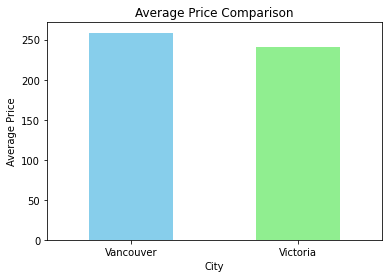

In [ ]:

# Bar plot for average price comparison
average_price = df.groupby('City')['price'].mean()
average_price.plot(kind='bar', rot=0, color=['skyblue', 'lightgreen'])
plt.title('Average Price Comparison')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

## b. Average price for Quarter 1 comparing Vancouver and Victoria city

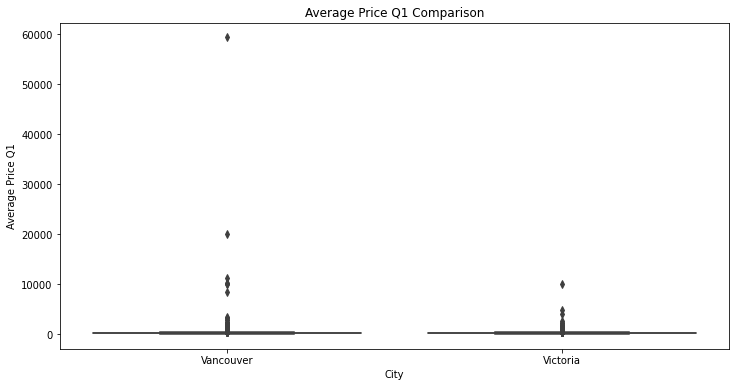

In [ ]:

# Boxplot for average price for Quarter 1 comparing Vancouver and Victoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='calc_avg_price_Q1', data=df_listings)
plt.title('Average Price Q1 Comparison')
plt.xlabel('City')
plt.ylabel('Average Price Q1')
plt.show()

## c. Average price for Quarter 2 comparing Vancouver and Victoria city

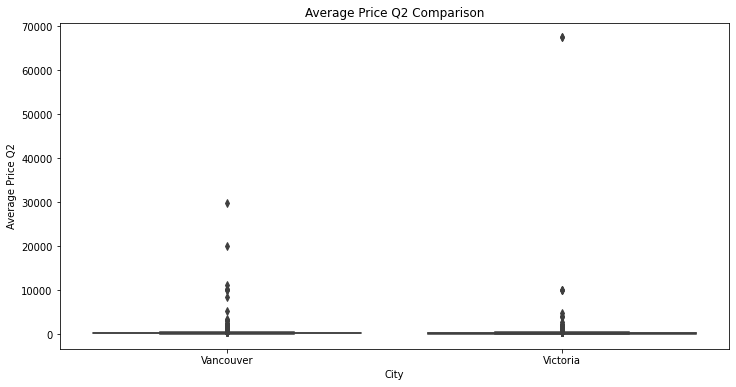

In [ ]:

# Boxplot for average price for Quarter 2 comparing Vancouver and Victoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='calc_avg_price_Q2', data=df_listings)
plt.title('Average Price Q2 Comparison')
plt.xlabel('City')
plt.ylabel('Average Price Q2')
plt.show()

## d. Average price for Quarter 3 comparing Vancouver and Victoria city

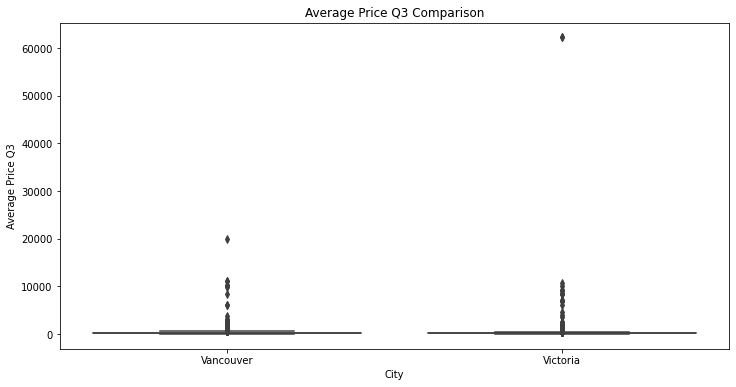

In [ ]:

# Boxplot for average price for Quarter 3 comparing Vancouver and Victoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='calc_avg_price_Q3', data=df_listings)
plt.title('Average Price Q3 Comparison')
plt.xlabel('City')
plt.ylabel('Average Price Q3')
plt.show()

## e. Average price for Quarter 4 comparing Vancouver and Victoria city

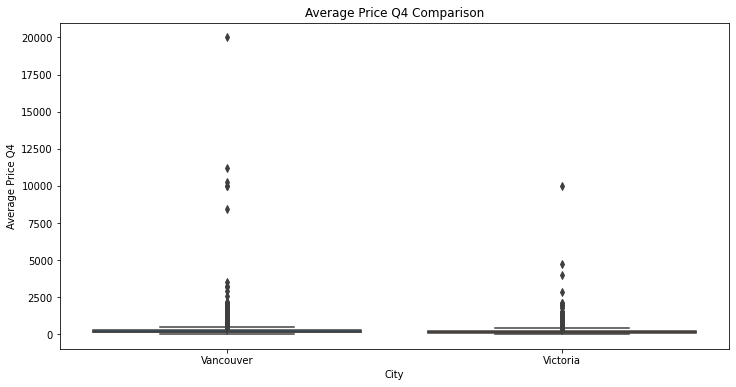

In [ ]:

# Boxplot for average price for Quarter 4 comparing Vancouver and Victoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='calc_avg_price_Q4', data=df_listings)
plt.title('Average Price Q4 Comparison')
plt.xlabel('City')
plt.ylabel('Average Price Q4')
plt.show()

## f. Number of reviews comparison between Vancouver & Victoria city

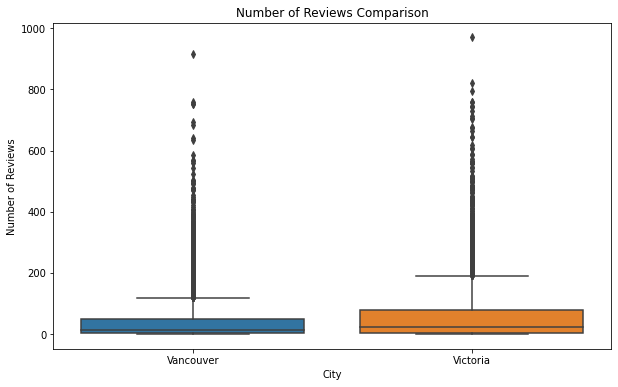

In [ ]:

# Compare number of reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='number_of_reviews', data=df_listings)
plt.title('Number of Reviews Comparison')
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.show()

## g. Review sentiment comparison between Vancouver & Victoria city

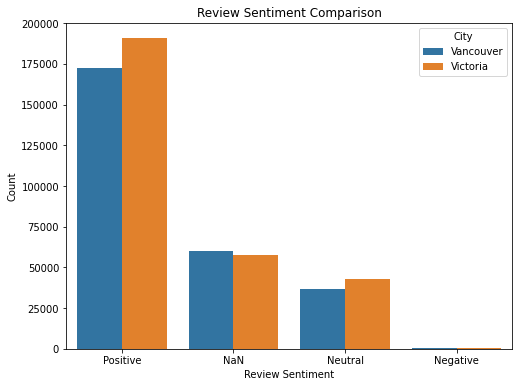

In [ ]:

# Countplot for sentiment distribution in each city
plt.figure(figsize=(8, 6))
sns.countplot(x='review_sentiment', hue='City', data=df_reviews)
plt.title('Review Sentiment Comparison')
plt.xlabel('Review Sentiment')
plt.ylabel('Count')
plt.show()

## h. Boxplot to compare the price for different room type

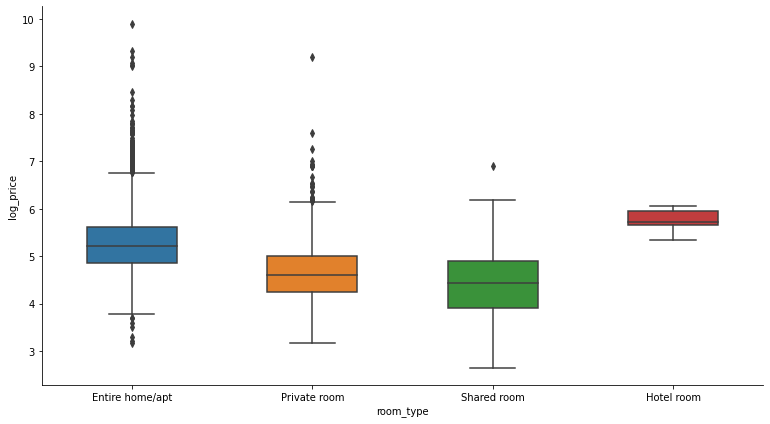

In [ ]:

import seaborn as sns
df_listings_copy['log_price'] = np.log(df_listings_copy['price'])
sns.catplot(
    data=df_listings_copy,
    x='room_type', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

# G. Conclusion

We have done some data cleaning and review before amalgamating the different datasets in a master one. We added some calculated columns mainly by aggregation per host or neighbourhood.  
We also created 2 summary datasets to allow a future analysis from the host point of view or from the neighborhood point of view.  
After this preparation work, we believe the data is ready for further statistical analysis and modeling.  

Analysis could answer to questions like :  
What are the 3 hot spots in Victoria and Vancouver for having a AirBnb?  
What are the factors that would lead to a better income from having a property rented with AirBnB?  
As a visitor which neighbourhood would give the best price for the location?  

In [ ]:
sum_hosts.columns

Index(['host_id', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'City', 'calc_listings_count',
       'calc_avg_dist_from_center', 'calc_avg_rating', 'calc_avg_avail_365',
       'calc_future_avg_price', 'calc_future_min_price',
       'calc_future_max_price', 'calc_income_prev', 'calc_total_reviews',
       'calc_first_review', 'calc_last_review'],
      dtype='object')

In [ ]:
sum_neighbourhoods.columns

Index(['neighb_name', 'neighb_group', 'City', 'calc_listings_count',
       'calc_avg_dist_from_center', 'calc_avg_rating', 'calc_avg_avail_365',
       'calc_future_avg_price', 'calc_future_min_price',
       'calc_future_max_price', 'calc_total_hosts_x', 'calc_total_hosts_y',
       'calc_total_reviews'],
      dtype='object')